In [1]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import statsmodels.api as stats
import sklearn as sklearn
from sklearn import preprocessing

In [2]:
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("matplotlib version:", mat.__version__)
print("statsmodels version:", stats.__version__)
print("sklearn version:", sklearn.__version__)

pandas version: 1.0.5
numpy version: 1.18.5
matplotlib version: 3.3.0
statsmodels version: 0.11.1
sklearn version: 0.23.1


Mean for X: 1515.463698630137
Mean for Y: 180921.19589041095

Standard Deviation for X: 525.4803834232025
Standard Deviation for Y: 79442.50288288662

X_min: 334 and X_max: 5642 for X
Diff of X_min and X_max for X is 5308



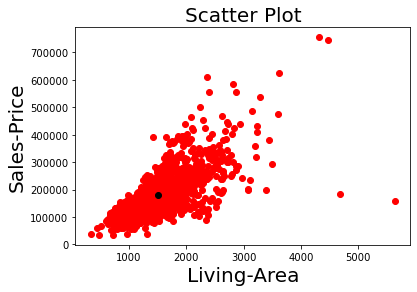

In [3]:
# Read the data from the csv file
dataset = pd.read_csv("train.csv")

# print(dataset.describe())
# print(dataset.shape)    # (1460, 81)

# The dataset is huge and has so many independent variables.
# But we will be taking into account only the Living-Area to predict the Sales-Price of the houses.
# X corresponds to the gross living area (feature)
# Y corresponds to the predicted sales price (label)
X = dataset['GrLivArea']
Y = dataset['SalePrice']

X_mean = X.mean()
Y_mean = Y.mean()
print("Mean for X:", X_mean)
print("Mean for Y:", Y_mean)
print()

X_std = X.std()
Y_std = Y.std()
print("Standard Deviation for X:", X_std)
print("Standard Deviation for Y:", Y_std)
print()

X_min = X.min()
X_max = X.max()
X_diff = (X_max - X_min)
print("X_min: {} and X_max: {} for X".format(X_min, X_max))
print("Diff of X_min and X_max for X is {}".format(X_diff))
print()

plt.scatter(X, Y, color = "red")
plt.title("Scatter Plot", fontsize = 20)
plt.xlabel("Living-Area", fontsize = 20)
plt.ylabel("Sales-Price", fontsize = 20)

# This shows the point at which both X and Y values are equal to X_mean and Y_mean respectively.
plt.scatter(X_mean, Y_mean, color = "black")
plt.show()
print()

In [4]:
# Normalize the dataset
X_normalized = ((X - X_min)/X_diff)  # not being here

# Standardize the dataset
X_standardized = ((X - X_mean)/X_std)

# Add a column of 1s for the gradient descent
X_modified = np.c_[np.ones(X.shape[0]), X_standardized]
print(X_modified)

# NOTE: We can also make use of de-standardize and de-normalize preocesses if the situation requires it.

[[ 1.          0.37020659]
 [ 1.         -0.48234664]
 [ 1.          0.51483616]
 ...
 [ 1.          1.56910958]
 [ 1.         -0.83250243]
 [ 1.         -0.49376477]]


In [5]:
# Gradient Descent
alpha = 0.01 #Step size
iterations = 2000 #No. of iterations
m = Y.size #No. of data points
np.random.seed(8496) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with
# print(theta)  # [0.76779152 0.1691429 ]

#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

#Pass the relevant variables to the function and get the new values back...
past_thetas, past_costs = gradient_descent(X_modified, Y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))
print()
# print(past_thetas)

Gradient Descent: 180921.20, 56294.90



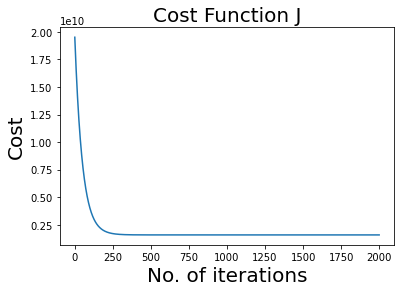

In [6]:
# # Plot the cost function v/s number of iterations
plt.title('Cost Function J', fontsize = 20)
plt.xlabel('No. of iterations', fontsize = 20)
plt.ylabel('Cost', fontsize = 20)
plt.plot(past_costs)
plt.show()
print()

theta[0]: 180921.19555321938 and theta[1]: 56294.901999245616


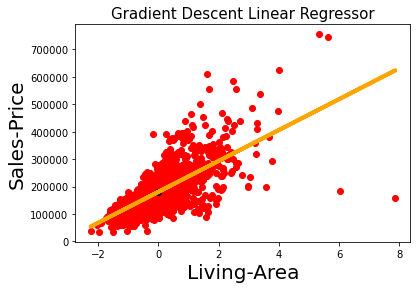

In [7]:
# Show the model
print("theta[0]: {} and theta[1]: {}".format(theta[0], theta[1]))
X_retrieved = X_modified[:,1]
Y_predicted = theta[1]*X_retrieved + theta[0]

X_retrieved_mean = X_retrieved.mean()
Y_predicted_mean = Y_predicted.mean()

plt.scatter(X_retrieved, Y, color = "red")
plt.gca().set_title("Gradient Descent Linear Regressor", fontsize = 15)
plt.xlabel("Living-Area", fontsize = 20)
plt.ylabel("Sales-Price", fontsize = 20)

# This shows the point at which both X and Y values are equal to X_mean and Y_mean respectively.
plt.plot(X_retrieved, Y_predicted, lw = 4, c = 'orange', label = 'regression line')
plt.scatter(X_retrieved_mean, Y_predicted_mean, color = "black")
plt.show()
print()